In [1]:
#webscraping libraries
import requests as rq
from bs4 import BeautifulSoup as bs

# dataframe libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns; sns.set()

url = 'https://newyork.craigslist.org/d/apartments-housing-for-rent/search/apa'
#url = 'https://newyork.craigslist.org/d/apartments-housing-for-rent/search/apa?s=120'

In [2]:
# create soup object
page = rq.get(url)
soup = bs(page.content, 'html.parser')

In [3]:
# after inspecting the page, the urls exist with 'h3'
h3s = soup.find_all('h3', class_ = 'result-heading',
                   # attrs=('class': 'result-heading') 
                   )

In [4]:
h3s[:2]

[<h3 class="result-heading">
 <a class="result-title hdrlnk" data-id="7319250133" href="https://newyork.craigslist.org/brk/apa/d/brooklyn-15-bedroom-for-rent/7319250133.html" id="postid_7319250133">1.5 bedroom for rent</a>
 </h3>,
 <h3 class="result-heading">
 <a class="result-title hdrlnk" data-id="7319249897" href="https://newyork.craigslist.org/brk/apa/d/brooklyn-bed-bath-duplex-no-fee/7319249897.html" id="postid_7319249897">5 bed/4 bath duplex!! *no fee*</a>
 </h3>]

In [5]:
len(h3s)

120

In [6]:
# links are in 'href' , with 'a' object
h3s[0].find('a')['href']

'https://newyork.craigslist.org/brk/apa/d/brooklyn-15-bedroom-for-rent/7319250133.html'

In [7]:
#find all links in each item in the list

links = [post.find('a')['href'] for post in h3s]
links[:5]

['https://newyork.craigslist.org/brk/apa/d/brooklyn-15-bedroom-for-rent/7319250133.html',
 'https://newyork.craigslist.org/brk/apa/d/brooklyn-bed-bath-duplex-no-fee/7319249897.html',
 'https://newyork.craigslist.org/brk/apa/d/brooklyn-spacious-bedroom/7319246383.html',
 'https://newyork.craigslist.org/brk/apa/d/brooklyn-grand-street-large-one-bedroom/7319246086.html',
 'https://newyork.craigslist.org/brk/apa/d/brooklyn-huge-sunny-loft-right-off-the/7319243322.html']

In [8]:
len(links)

120

In [31]:
test_url = links[0]
page = rq.get(test_url)
soup = bs(page.content, 'html.parser')

In [32]:
test_url

'https://newyork.craigslist.org/brk/apa/d/brooklyn-15-bedroom-for-rent/7319250133.html'

In [38]:
soup.find('span', attrs= {'class': 'price'})

<span class="price">$1,600</span>

In [39]:
# getting to the price 

int(soup.find('span', attrs= {'class': 'price'}).contents[0].replace('$', '').replace(',', ''))

1600

In [41]:
soup.find('small').contents[0]

' (Brooklyn, NY)'

In [42]:
# getting location 

soup.find('small').contents[0].strip()\
    .replace('(','')\
    .replace(')','')\
    .replace(' ','')\
    .replace(' ','_')\
    .lower()

'brooklyn,ny'

In [44]:
soup.find('span', attrs ={'class' : "shared-line-bubble"})

<span class="shared-line-bubble"><b>2BR</b> / <b>1Ba</b></span>

In [45]:
# bedrooms 

int(soup.find('span', attrs ={'class' : "shared-line-bubble"}).text.split('/')[0][:-3])

2

In [46]:
# bathrooms

int(soup.find('span', attrs ={'class' : "shared-line-bubble"}).contents[2].contents[0][:-2])

1

In [47]:
def info_grabber(url):
    
    """
    Scrape iformation about apt listed at corresponding URL 
    returns a dict with location, num_bedrooms, num_bath, url
    
    """
    info ={}
    
    # converting page to soup object
    page = rq.get(url)
    soup = bs(page.content, 'html.parser')
    
    # getting price
    price = soup.find('span', attrs= {'class': 'price'})
                      
    if price is not None:
        info['price'] = float(price.contents[0].replace('$', '').replace(',', ''))
    else:    
        print(f'Price Error: {url}')
        # put NaN in its place
        info['price'] = np.nan
    
    # getting location
    try: 
        info['location'] = soup.find_all('small')[0].contents[0].strip()\
            .replace('(','')\
            .replace(')','')\
            .replace(' ','')\
            .replace(' ','_')\
            .lower()
        
    except IndexError :

        print(f'Location Error: {url}')
        # put NaN in its place
        info['location'] = np.nan

        
    # getting bedrooms 
    try:
        info['num_beds'] = int(soup.find('span', attrs ={'class' : "shared-line-bubble"}).contents[0].contents[0][:-2])
    
    except :
        print(f'Bedrooms Error: {url}')
        # put NaN in its place
        info['num_beds'] = np.nan
        # put NaN in its place
        info['num_baths'] = np.nan
        
    # getting bathrooms
    
    bathrooms = soup.find('span', attrs ={'class' : "shared-line-bubble"})
    if bathrooms is not None:
        bath_value = bathrooms.contents[2].contents[0][:-2]
        if len(bath_value) < 3:
            info['num_bath'] = float(bathrooms.contents[2].contents[0][:-2])
        else:
            info['num_baths'] = 1
    else :
        print(f'Bathrooms Error: {url}')
        # put NaN in its place
        info['num_baths'] = np.nan
    
    info['url'] = url
        
    return info

In [48]:
%%time 

apts_info = [info_grabber(link) for link in links]

Price Error: https://newyork.craigslist.org/mnh/apa/d/new-york-serene-immaculate-uws-studio/7319191257.html
Location Error: https://newyork.craigslist.org/mnh/apa/d/new-york-serene-immaculate-uws-studio/7319191257.html
Bedrooms Error: https://newyork.craigslist.org/mnh/apa/d/new-york-serene-immaculate-uws-studio/7319191257.html
Bathrooms Error: https://newyork.craigslist.org/mnh/apa/d/new-york-serene-immaculate-uws-studio/7319191257.html
Location Error: https://newyork.craigslist.org/brk/apa/d/brooklyn-no-feegreat-1bed-dishwasher/7319095221.html
Location Error: https://newyork.craigslist.org/brk/apa/d/brooklyn-no-feegorgeous-1bed-hw-floors/7319094393.html
Location Error: https://newyork.craigslist.org/brk/apa/d/brooklyn-no-fee-bedroom-has-hardwood/7319092658.html
Location Error: https://newyork.craigslist.org/brk/apa/d/brooklyn-no-feegreat-2beds-dishwasher/7319091490.html
Location Error: https://newyork.craigslist.org/brk/apa/d/brooklyn-no-feethis-is-genuine-loft/7319090189.html
Price 

In [49]:
apts_info[:2]

[{'price': 1600.0,
  'location': 'brooklyn,ny',
  'num_beds': 2,
  'num_bath': 1.0,
  'url': 'https://newyork.craigslist.org/brk/apa/d/brooklyn-15-bedroom-for-rent/7319250133.html'},
 {'price': 4000.0,
  'location': 'bushwick',
  'num_beds': 5,
  'num_bath': 4.0,
  'url': 'https://newyork.craigslist.org/brk/apa/d/brooklyn-bed-bath-duplex-no-fee/7319249897.html'}]

In [50]:
# df = pd.DataFrame(apts_info) 

In [51]:
# df.head()

### Last availible Page

In [52]:
page = rq.get('https://newyork.craigslist.org/d/apartments-housing-for-rent/search/apa?s=2880')
soup = bs(page.content, 'html.parser')
soup.find('a', {'class': 'button next'})['href']

''

### Next Availible Page

In [54]:
page = rq.get('https://newyork.craigslist.org/d/apartments-housing-for-rent/search/apa?s=2760')
soup = bs(page.content, 'html.parser')
soup.find('a', {'class': 'button next'})['href']

'/d/apartments-housing-for-rent/search/apa?s=2880'

In [92]:
def scrape_all(url):
    
    """
    scrape all availible pages with coressponding apt info
    """
    
    based_url =  'https://newyork.craigslist.org/d/apartments-housing-for-rent/search/apa'
    
    page = rq.get(url)
    soup = bs(page.content, 'html.parser')
    h3s = soup.find_all('h3', class_ = 'result-heading')
    links = [post.find('a')['href'] for post in h3s]
    
    data =  [info_grabber(link) for link in links]
    
    # pager = soup.find('span', {'class': 'button next'})
    # if pager:
    
    next_url = soup.find('a', {'class': 'button next'})['href']
    if len(next_url) > 0:
        next_page = based_url + next_url
        print('Scraping: ', next_page)

        data.extend(scrape_all(next_page))

    return data

In [93]:
all_data = scrape_all(url)

Location Error: https://newyork.craigslist.org/wch/apa/d/irvington-charming-bedroomcottage-in/7311118856.html
Scraping:  https://newyork.craigslist.org/d/apartments-housing-for-rent/search/apa/d/apartments-housing-for-rent/search/apa?s=120
Location Error: https://newyork.craigslist.org/wch/apa/d/bronx-nice-bedroom-apartements-available/7311010422.html
Scraping:  https://newyork.craigslist.org/d/apartments-housing-for-rent/search/apa/d/apartments-housing-for-rent/search/apa?s=240
Location Error: https://newyork.craigslist.org/mnh/apa/d/new-york-magnificent-3br-duplex-an/7310941320.html
Scraping:  https://newyork.craigslist.org/d/apartments-housing-for-rent/search/apa/d/apartments-housing-for-rent/search/apa?s=360
Bedrooms Error: https://newyork.craigslist.org/brk/apa/d/new-york-large-alcove-studio-no-fee/7310867144.html
Bathrooms Error: https://newyork.craigslist.org/brk/apa/d/new-york-large-alcove-studio-no-fee/7310867144.html
Price Error: https://newyork.craigslist.org/mnh/apa/d/new-y

In [107]:
all_data[:2]

[{'price': 1380.0,
  'location': 'elmhurst',
  'num_beds': 1,
  'num_bath': 1.0,
  'url': 'https://newyork.craigslist.org/que/apa/d/elmhurst-studio-with-big-backyard/7311219299.html'},
 {'price': 2100.0,
  'location': 'astoriaqueens',
  'num_beds': 2,
  'num_bath': 1.0,
  'url': 'https://newyork.craigslist.org/que/apa/d/astoria-2bedroom-1bath-apartment-close/7311217044.html'}]

In [108]:
df_final = pd.DataFrame(all_data)

In [114]:
df_final = df_final.drop(columns=['num_baths'])

In [115]:
df_final.head()

,price,location,num_beds,num_bath,url
0,1380.0,elmhurst,1.0,1.0,https://newyork.craigslist.org/que/apa/d/elmhu...
1,2100.0,astoriaqueens,2.0,1.0,https://newyork.craigslist.org/que/apa/d/astor...
2,2600.0,bushwick,3.0,1.0,https://newyork.craigslist.org/brk/apa/d/brook...
3,1500.0,queensvillagepppl,2.0,1.0,https://newyork.craigslist.org/que/apa/d/queen...
4,1800.0,astoria,1.0,1.0,https://newyork.craigslist.org/brx/apa/d/astor...


In [116]:
df_final.to_csv('scrapped_data.csv', )

In [119]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   price     2997 non-null   float64
 1   location  2964 non-null   object 
 2   num_beds  2999 non-null   float64
 3   num_bath  2846 non-null   float64
 4   url       3000 non-null   object 
dtypes: float64(3), object(2)
memory usage: 117.3+ KB


In [139]:
df_final.num_bath.value_counts()

1.0    2455
2.0     355
3.0      28
4.0       4
0.0       3
8.0       1
Name: num_bath, dtype: int64

1.0    2455
2.0     355
3.0      28
4.0       4
0.0       3
8.0       1
Name: num_bath, dtype: int64




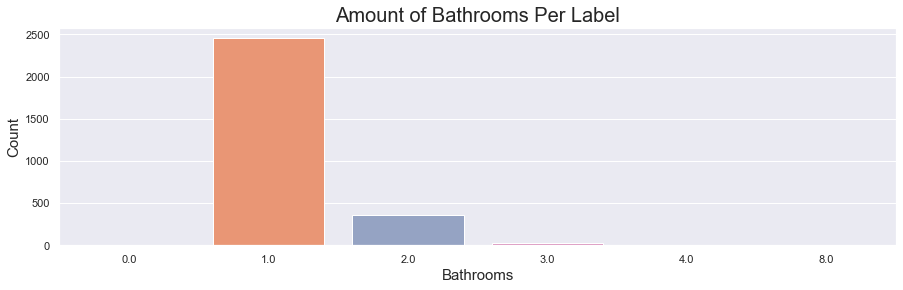

In [136]:
print(df_final['num_bath'].value_counts())

print('\n')
# Class Imbalance 

fig, ax = plt.subplots(figsize=(15,4))
ax = sns.countplot(df_final['num_bath'], palette='Set2')

ax.set_title('Amount of Bathrooms Per Label',fontsize = 20)
ax.set_xlabel('Bathrooms',fontsize = 15)
ax.set_ylabel('Count',fontsize = 15)
plt.show()

1.0    1156
2.0     880
3.0     512
0.0     299
4.0     120
5.0      23
6.0       9
Name: num_beds, dtype: int64




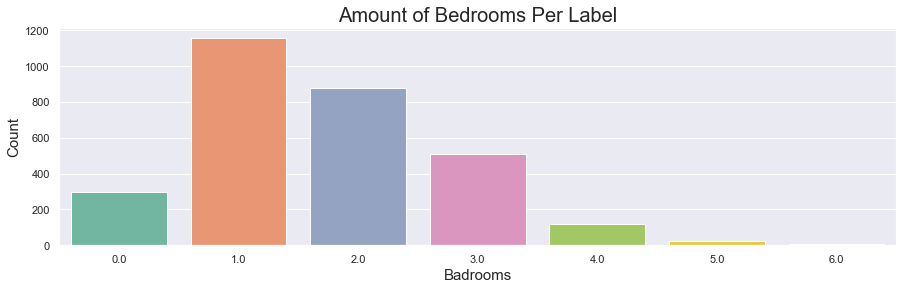

In [138]:
print(df_final['num_beds'].value_counts())

print('\n')
# Class Imbalance 

fig, ax = plt.subplots(figsize=(15,4))
ax = sns.countplot(df_final['num_beds'], palette='Set2')

ax.set_title('Amount of Bedrooms Per Label',fontsize = 20)
ax.set_xlabel('Badrooms',fontsize = 15)
ax.set_ylabel('Count',fontsize = 15)
plt.show()